### Training Softmax Regression on MNIST
Based on the tutorial previously available in the tutorial materials for TF version 1.

In [1]:
# Import TensorFlow and load the data.
import tensorflow as tf
import numpy as np

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape # We need to flatten these 28-by-28 images.

(60000, 28, 28)

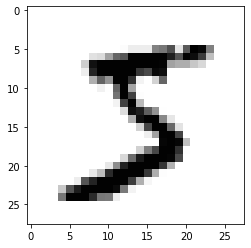

In [4]:
import matplotlib as mp
import matplotlib.pyplot as plt

plt.imshow( -x_train[0,:,:], cmap='gray') # -x_train because 0 in tensor is black.

In [5]:
train_shape = x_train.shape
x_train = tf.reshape( x_train, [train_shape[0], 28*28] )
test_shape = x_test.shape
x_test = tf.reshape( x_test, [test_shape[0], 28*28] )  

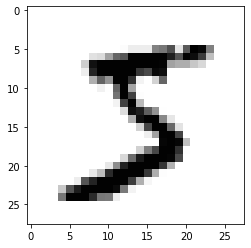

In [6]:
# Make sure that reshaping didn't break anything.
plt.imshow( np.reshape(-x_train[0,:], [28,28] ), cmap='gray')

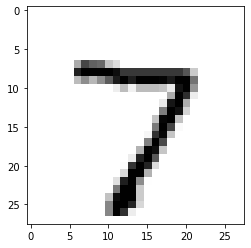

In [7]:
# Make sure that reshaping back gets us the thing we expect.
plt.imshow( np.reshape(-x_test[0,:], [28,28] ), cmap='gray')

In [8]:
y_train.shape # ytrain and yest are just vectors of labels.

(60000,)

In [9]:
y_train[:4] # y labels are just the digits 0 thru 9

array([5, 0, 4, 1], dtype=uint8)

In [10]:
y_train = tf.one_hot( y_train, depth=10 )
y_test = tf.one_hot( y_test, depth=10 )
y_train.shape

TensorShape([60000, 10])

In [11]:
y_train[:4,:]

<tf.Tensor: shape=(4, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

In [12]:
class SoftmaxModel(tf.Module):
    def __init__(self, d_data, d_class):
        super().__init__()
        self.W = tf.Variable(tf.random.normal(shape=[d_class,d_data], dtype=tf.float64) )
        self.b = tf.Variable(tf.random.normal(shape=[d_class], dtype=tf.float64) )
    def __call__(self, x):
        z = tf.linalg.matvec( self.W, x) + self.b
        return tf.nn.softmax( z )

In [13]:
def crossent_loss(y_true, y_pred):
    crossents = tf.keras.losses.categorical_crossentropy(y_true, y_pred)
    return tf.reduce_mean( crossents ) 

In [14]:
def accuracy( y_true, y_pred ):
    hits = tf.math.equal( tf.math.argmax(y_true,1), tf.math.argmax(y_pred,1) )
    hits = tf.cast( hits, dtype=tf.float32 )
    return tf.reduce_mean( hits )

In [15]:
def train(model, images, labels, learning_rate):

    with tf.GradientTape() as t:
        current_loss = crossent_loss(labels, model(images))

    dW, db = t.gradient(current_loss, [model.W, model.b])

    model.W.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)

In [16]:
def training_loop_logging(model, x, y, epochs=1):
    for e in range(epochs):
        ds = tf.data.Dataset.from_tensor_slices( (x, y) )
        ds = ds.shuffle( x.shape[0] ).batch(100)
        for (xbatch,ybatch) in ds:
            train(model, xbatch, ybatch, learning_rate=0.5)

        predicted = model(x)
        current_loss = crossent_loss(y, predicted)
        current_acc = accuracy( y, predicted )
        print("Epoch %2d: loss=%2.5f, acc=%2.5f" %
                  (e, current_loss, current_acc) )
    predicted = model(x)
    train_loss = crossent_loss(y, predicted)
    train_acc = accuracy( y, predicted )
    print("Final state: train_loss=%2.5f, train_acc=%2.5f" %
                  (train_loss, train_acc) )

In [17]:
def training_loop(model, x, y, epochs=1):
    for e in range(epochs):
        ds = tf.data.Dataset.from_tensor_slices( (x, y) )
        ds = ds.shuffle( x.shape[0] ).batch(100)
        for (xbatch,ybatch) in ds:
            train(model, xbatch, ybatch, learning_rate=0.5)
    predicted = model(x)
    train_loss = crossent_loss(y, predicted)
    train_acc = accuracy( y, predicted )
    print("Final state: train_loss=%2.5f, train_acc=%2.5f" %
                  (train_loss, train_acc) )

In [ ]:
classifier =  SoftmaxModel( 784, 10 )
training_loop( classifier, x_train, y_train, 20 )

In [23]:
accuracy( y_test, classifier(x_test))

<tf.Tensor: shape=(), dtype=float32, numpy=0.913>